# Example

The example uses the dataset from here:
    
    https://archive.ics.uci.edu/ml/datasets/synthetic+control+chart+time+series

However, it is conveniently placed in this repository for reproducability purposes.

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
from clustering import DTWClustering

%matplotlib inline

## Load Data

In [2]:
data = np.loadtxt('data/synthetic_control.data')

Labels

* 1-100 Normal
* 101-200 Cyclic
* 201-300 Increasing trend
* 301-400 Decreasing trend
* 401-500 Upward shift
* 501-600 Downward shift

In [3]:
labels = []
base_labels = (
    'Normal',
    'Cyclic',
    'Increasing trend',
    'Decreasing trend',
    'Upward shift',
    'Downward shift'
)

for label in base_labels:
    if labels:
        labels.extend([label] * 100)
    else:
        labels = [label] * 100

## Create Model

Create the model with the window size of 6 and keep everything else as default.

In [4]:
model = DTWClustering(data, 6)

In [5]:
model.train()

0.0013240738771855831 queue placement complete
5.886266995919868 computations complete
5.886916270013899 iteration complete
0.000916491961106658 queue placement complete
5.249669988872483 computations complete
5.250233528902754 iteration complete
0.0008954368531703949 queue placement complete
5.0632675918750465 computations complete
5.063845901051536 iteration complete
0.0008730350527912378 queue placement complete
7.0357065631542355 computations complete
7.036415050039068 iteration complete
0.0010878839530050755 queue placement complete
5.078372027957812 computations complete
5.079208219889551 iteration complete
0.0015092890243977308 queue placement complete
7.700026772916317 computations complete
7.701383586972952 iteration complete
0.0021267379634082317 queue placement complete
7.688120828941464 computations complete
7.690494542941451 iteration complete
0.002533555030822754 queue placement complete
5.599303829949349 computations complete
5.5999103509821 iteration complete
0.00088725

## Visualize Centroids

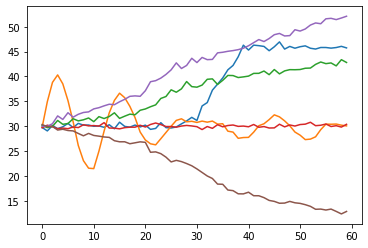

In [6]:
for centroid in model.centroids:
    plt.plot(np.arange(len(centroid)), centroid)

## Visualize Clusters

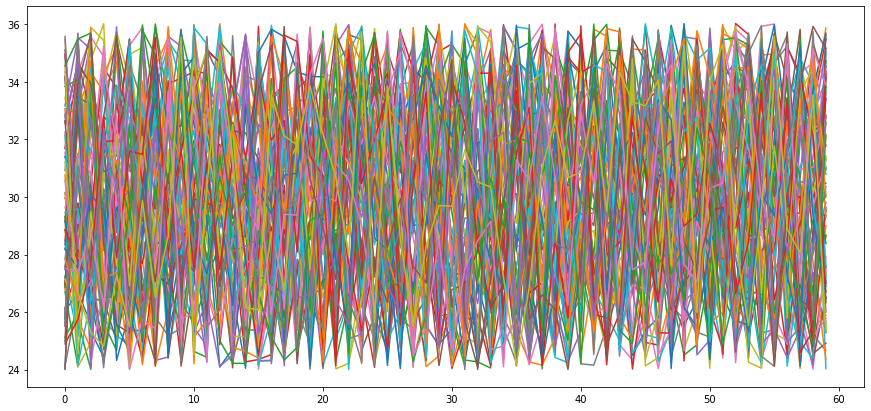

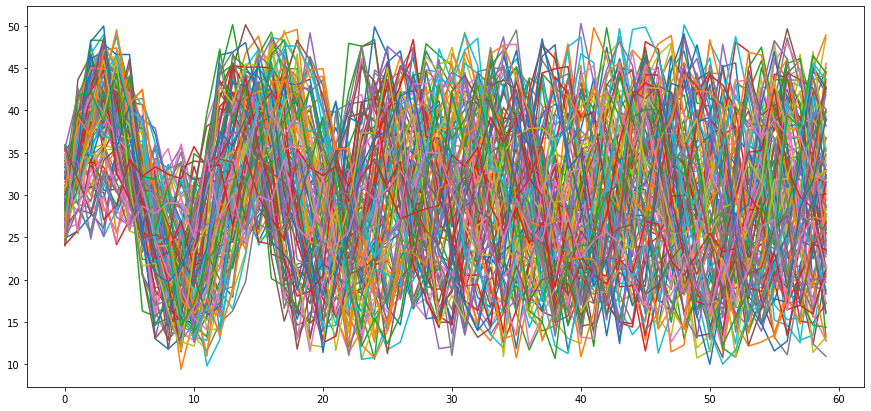

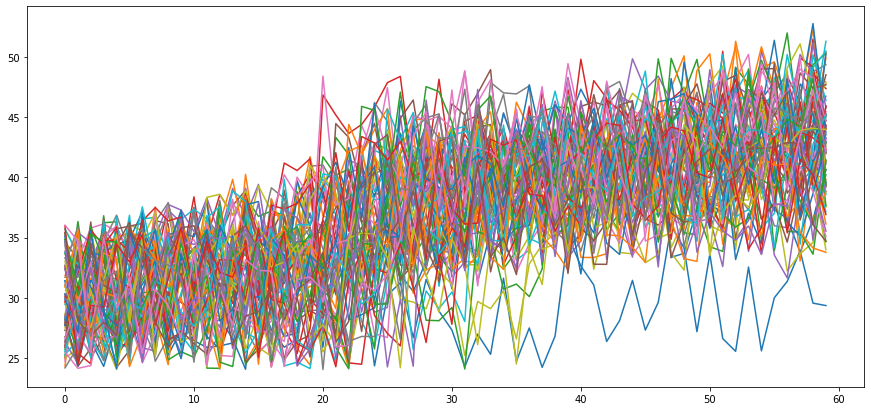

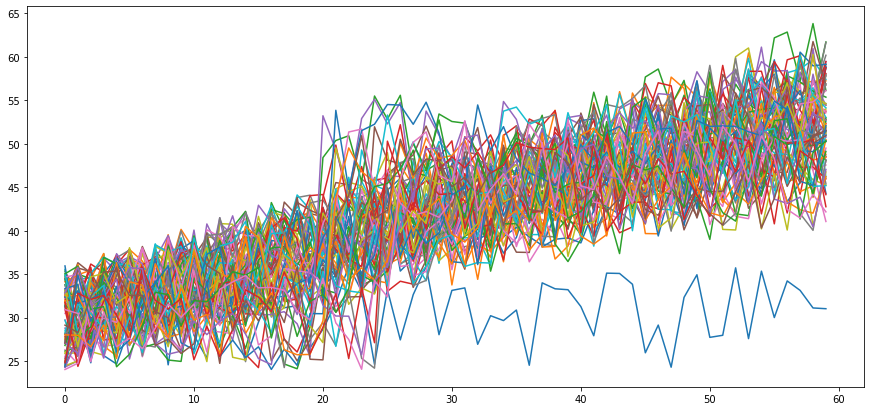

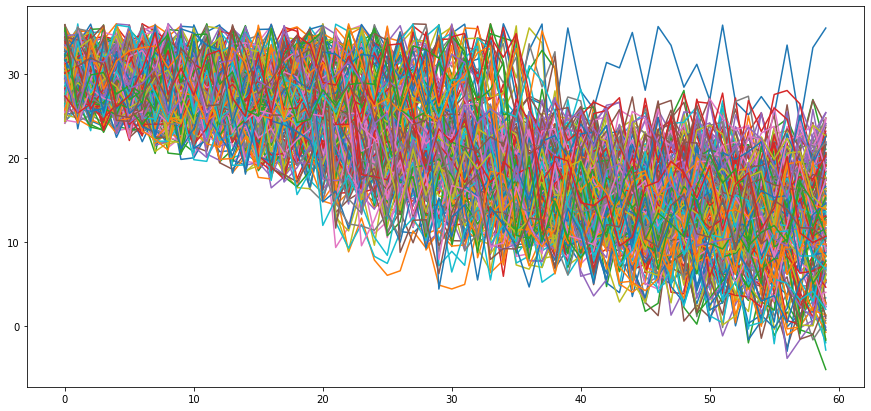

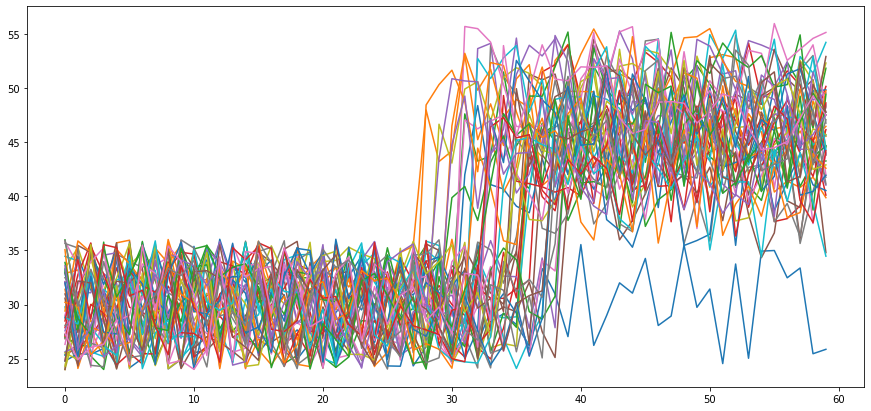

In [7]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = data[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    for series_index in model.clusters[centroid_key]:
        series = data[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()

## Predict

In [8]:
model.predict(data[0])

(25.775066797496777, 5)